# Exercises

## Intro

You will think about and calculate permutation importance with a sample of data from the [Taxi Fare Prediction](https://www.kaggle.com/c/new-york-city-taxi-fare-prediction) competition.

We won't focus on data exploration or model building for now. You can just run the cell below to 
- Load the data
- Divide the data into training and validation
- Build a model that predicts taxi fares
- Print a few rows for you to review

In [1]:
# Loading data, dividing, modeling and EDA below
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

data = pd.read_csv('../input/new-york-city-taxi-fare-prediction/train.csv', nrows=50000)


## Briefly Exploratory Data Analysis

In [8]:
data.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


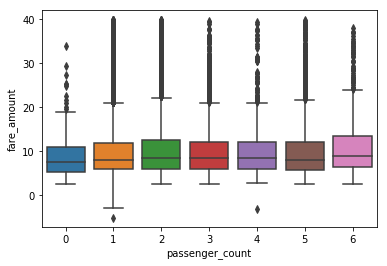

In [11]:
sns.boxplot(x="passenger_count",y="fare_amount",data=data[data["fare_amount"]<40])

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


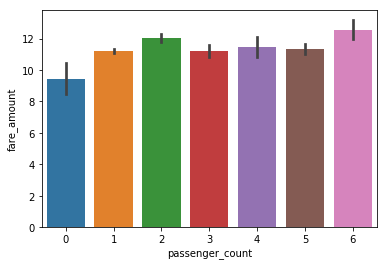

In [12]:
sns.barplot(x="passenger_count",y="fare_amount",data=data)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


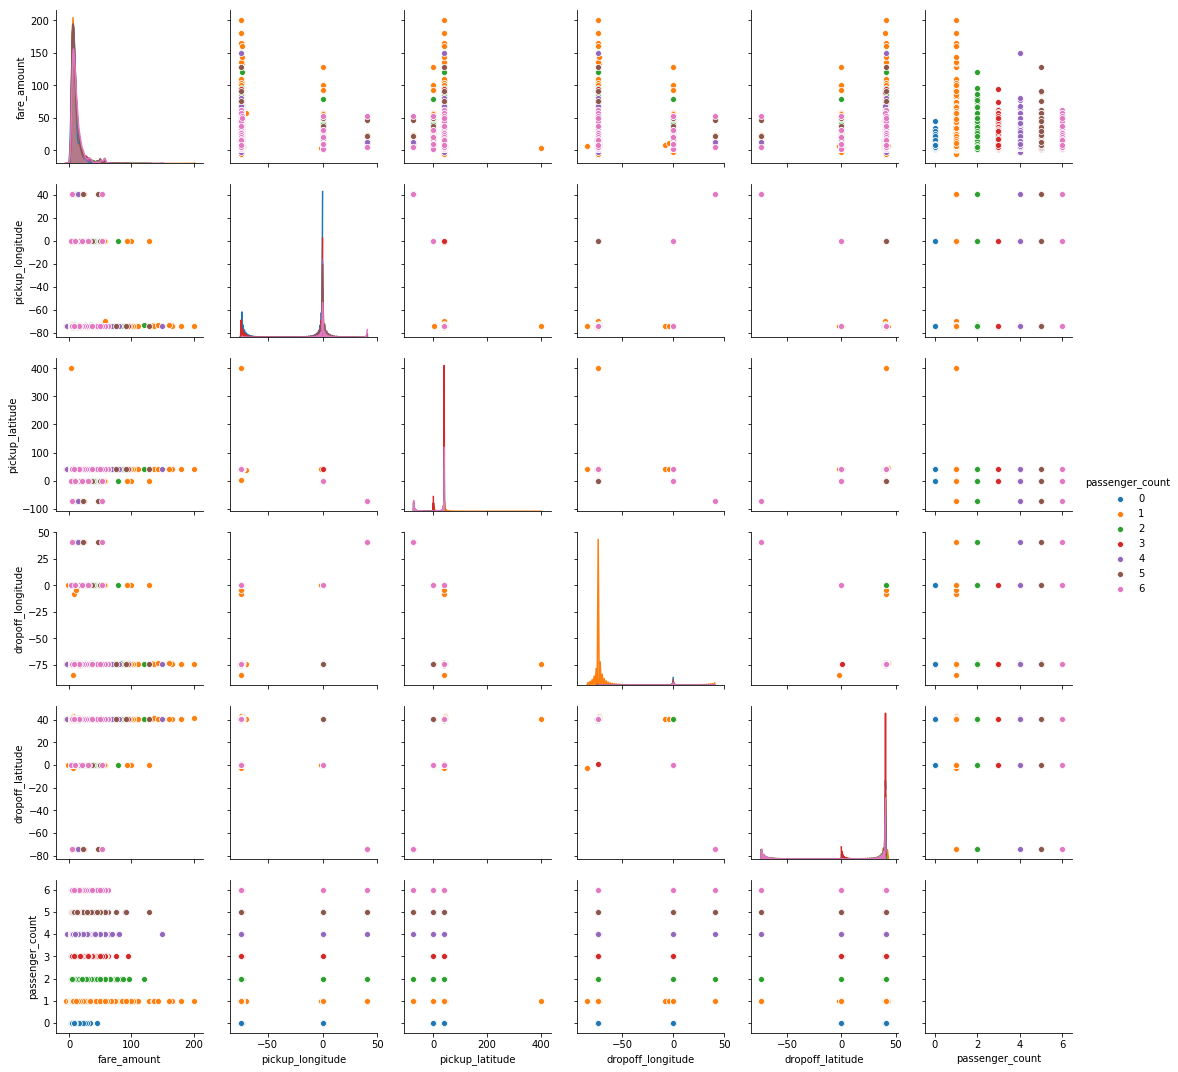

In [13]:
sns.pairplot(data,hue="passenger_count")

In [18]:

# Remove data with extreme outlier coordinates or negative fares
data = data.query('pickup_latitude > 40.7 and pickup_latitude < 40.8 and ' +
                  'dropoff_latitude > 40.7 and dropoff_latitude < 40.8 and ' +
                  'pickup_longitude > -74 and pickup_longitude < -73.9 and ' +
                  'dropoff_longitude > -74 and dropoff_longitude < -73.9 and ' +
                  'fare_amount > 0'
                  )

y = data.fare_amount

base_features = ['pickup_longitude',
                 'pickup_latitude',
                 'dropoff_longitude',
                 'dropoff_latitude',
                 'passenger_count']

X = data[base_features]


train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
first_model = RandomForestRegressor(n_estimators=30, random_state=1).fit(train_X, train_y)

# Environment Set-Up for feedback system.
import sys
sys.path.append('../input/ml-insights-tools')
from learntools.core import binder
binder.bind(globals())
from ex2 import *
print("Setup Complete")

# show data
print("Data sample:")
data.head()

Setup Complete
Data sample:


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
6,2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
7,2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1


The following two cells may also be useful to understand the values in the training data:

In [34]:
train_X.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,23466.000000,23466.000000,23466.000000,23466.000000,23466.000000
mean,-73.976827,40.756931,-73.975359,40.757434,1.662320
std,0.014625,0.018206,0.015930,0.018659,1.290729
min,-73.999999,40.700013,-73.999999,40.700020,0.000000
25%,-73.987964,40.744901,-73.987143,40.745756,1.000000
50%,-73.979629,40.758076,-73.978588,40.758542,1.000000
75%,-73.967797,40.769602,-73.966459,40.770406,2.000000
max,-73.900062,40.799952,-73.900062,40.799999,6.000000


In [33]:
train_y.describe()

count    23466.000000
mean         8.472539
std          4.609747
min          0.010000
25%          5.500000
50%          7.500000
75%         10.100000
max        165.000000
Name: fare_amount, dtype: float64

## Question 1

The first model uses the following features
- pickup_longitude
- pickup_latitude
- dropoff_longitude
- dropoff_latitude
- passenger_count

Before running any code... which variables seem potentially useful for predicting `taxi fares`? Do you think permutation importance will necessarily identify these features as important?

- `passenger_count` seems to be a very powerful feature for predicting fares base on common sense, but it also know that services such as **Uber** vary prices base on distances and ubication not base on number of passengers.
- `pickup_longitude` and dropoff_longitude also could be useful because as a more distance cover a trip the more it will cost. So these features could provide this information.

Once you've thought about it, run `q_1.solution()` below to see how you might think about this before running the code.

In [32]:
q_1.solution()


<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> It would be helpful to know whether New York City taxis
    vary prices based on how many passengers they have. Most places do not
    change fares based on numbers of passengers.
    If you assume New York City is the same, than only the top 4 features listed should matter. At first glance, it seems all of those should matter equally.
    

## Question 2

Create a `PermutationImportance` object called `perm` to show the importances from `first_model`.  Fit it with the appropriate data and show the weights.

For your convenience, the code from the tutorial has been copied into a comment in this code cell.

In [ ]:
# Import the libraries
import eli5
from eli5.sklearn import PermutationImportance

# Make a small change to the code below to use in this problem. 
perm = PermutationImportance(first_model, random_state=1).fit(val_X, val_y)

# uncomment the following line to check your results
q_2.check()

# uncomment the following line to visualize your results
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

Uncomment the lines below for a hint or to see the solution.

In [31]:
q_2.solution()

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
```python

import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(first_model, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = base_features)

```

## Question 3
Before seeing these results, we might have expected each of the 4 directional features to be equally important.

But, on average, the latitude features matter more than the longititude features. Can you come up with any hypotheses for this?
- Latitud is a distance base on angles, it would be  affected in long distance trip.
- It would depends on the place the trip is being done.

After you've thought about it, check here for some possible explanations:

In [30]:
q_3.solution()

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
    1. Travel might tend to have greater latitude distances than longitude distances. If the longitudes values were generally closer together, shuffling them wouldn't matter as much.
    2. Different parts of the city might have different pricing rules (e.g. price per mile), and pricing rules could vary more by latitude than longitude.
    3. Tolls might be greater on roads going North<->South (changing latitude) than on roads going East <-> West (changing longitude).  Thus latitude would have a larger effect on the prediction because it captures the amount of the tolls.
    

## Question 4

Without detailed knowledge of New York City, it's difficult to rule out most hypotheses about why latitude features matter more than longitude.

A good next step is to disentangle the effect of being in certain parts of the city from the effect of total distance traveled.  

The code below creates new features for longitudinal and latitudinal distance. It then builds a model that adds these new features to those you already had.

Fill in two lines of code to calculate and show the importance weights with this new set of features. As usual, you can uncomment lines below to check your code, see a hint or get the solution.

In [29]:
# create new features
data['abs_lon_change'] = abs(data.dropoff_longitude - data.pickup_longitude)
data['abs_lat_change'] = abs(data.dropoff_latitude - data.pickup_latitude)

features_2  = ['pickup_longitude',
               'pickup_latitude',
               'dropoff_longitude',
               'dropoff_latitude',
               'abs_lat_change',
               'abs_lon_change']

X = data[features_2]
new_train_X, new_val_X, new_train_y, new_val_y = train_test_split(X, y, random_state=1)
second_model = RandomForestRegressor(n_estimators=30, random_state=1).fit(new_train_X, new_train_y)

# Create a PermutationImportance object on second_model and fit it to new_val_X and new_val_y
# Use a random_state of 1 for reproducible results that match the expected solution.
perm2 = PermutationImportance(second_model,random_state=1).fit(new_val_X,new_val_y) 

# show the weights for the permutation importance you just calculated
eli5.show_weights(perm2, feature_names = new_val_X.columns.tolist())

# uncomment and run the following cell to check your answer
# q_4.check()

Weight,Feature
0.5786 ± 0.0294,abs_lat_change
0.4469 ± 0.0509,abs_lon_change
0.0860 ± 0.0334,pickup_latitude
0.0735 ± 0.0114,dropoff_latitude
0.0735 ± 0.0101,dropoff_longitude
0.0609 ± 0.0067,pickup_longitude


How would you interpret these importance scores? Distance traveled seems far more important than any location effects. 

> The features we created are far more efficiently at providing information than those features separated, so It is important to keep in mind the power of feature engineering in any machine learning model.

But the location still affects model predictions, and dropoff location now matters slightly more than pickup location. Do you have any hypotheses for why this might be? The techniques used later in the course will help us dive into this more.

In [28]:
q_4.solution()

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
```python

data['abs_lon_change'] = abs(data.dropoff_longitude - data.pickup_longitude)
data['abs_lat_change'] = abs(data.dropoff_latitude - data.pickup_latitude)

features_2  = ['pickup_longitude',
               'pickup_latitude',
               'dropoff_longitude',
               'dropoff_latitude',
               'abs_lat_change',
               'abs_lon_change']

X = data[features_2]
new_train_X, new_val_X, new_train_y, new_val_y = train_test_split(X, y, random_state=1)
second_model = RandomForestRegressor(n_estimators=30, random_state=1).fit(new_train_X, new_train_y)

# Create a PermutationImportance object on second_model and fit it to new_val_X and new_val_y
perm2 = PermutationImportance(second_model).fit(new_val_X, new_val_y)

# show the weights for the permutation importance you just calculated
eli5.show_weights(perm2, feature_names = features_2)

```

## Question 5

A colleague observes that the values for `abs_lon_change` and `abs_lat_change` are pretty small (all values are between -0.1 and 0.1), whereas other variables have larger values.  Do you think this could explain why those coordinates had larger permutation importance values in this case?  

> Well, these feature has a narrow range than the the basic ones but I think it would depends on the Learning algorithm wea are using in this case RandomForest should be able to learn from this kind of variation whereas a Support vector machine would be affected by the scale.

Consider an alternative where you created and used a feature that was 100X as large for these features, and used that larger feature for training and importance calculations. Would this change the outputted permutaiton importance values?

Why or why not?

After you have thought about your answer, either try this experiment or look up the answer in the cell below

In [23]:
# create new features
data['abs_lon_change'] = abs(data.dropoff_longitude - data.pickup_longitude)*100
data['abs_lat_change'] = abs(data.dropoff_latitude - data.pickup_latitude)*100

features_2  = ['pickup_longitude',
               'pickup_latitude',
               'dropoff_longitude',
               'dropoff_latitude',
               'abs_lat_change',
               'abs_lon_change']

X = data[features_2]
new_train_X, new_val_X, new_train_y, new_val_y = train_test_split(X, y, random_state=1)
second_model = RandomForestRegressor(n_estimators=30, random_state=1).fit(new_train_X, new_train_y)

# Create a PermutationImportance object on second_model and fit it to new_val_X and new_val_y
# Use a random_state of 1 for reproducible results that match the expected solution.
perm2 = PermutationImportance(second_model,random_state=1).fit(new_val_X,new_val_y) 

# show the weights for the permutation importance you just calculated
eli5.show_weights(perm2, feature_names = new_val_X.columns.tolist())


Weight,Feature
0.5764 ± 0.0343,abs_lat_change
0.4478 ± 0.0511,abs_lon_change
0.0839 ± 0.0320,pickup_latitude
0.0746 ± 0.0111,dropoff_latitude
0.0746 ± 0.0099,dropoff_longitude
0.0592 ± 0.0055,pickup_longitude


> As we can see I have multiply it by 100 and  those feature are in a  different scale from the others variables does not affect at looking in th Permutation Importance. We conclude the result are the same as if they have a narrow range.

In [22]:
q_5.solution()

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
    The scale of features does not affect permutation importance per se. The only reason that rescaling a feature would affect PI is indirectly, if rescaling helped or hurt the ability of the particular learning method we're using to make use of that feature.
    That won't happen with tree based models, like the Random Forest used here.
    If you are familiar with Ridge Regression, you might be able to think of how that would be affected.
    That said, the absolute change features are have high importance because they capture total distance traveled, which is the primary determinant of taxi fares...It is not an artifact of the feature magnitude.
    

## Question 6

 You've seen that the feature importance for latitudinal distance is greater than the importance of longitudinal distance. From this, can we conclude whether travelling a fixed latitudinal distance tends to be more expensive than traveling the same longitudinal distance?

Why or why not? Check your answer below.

In [21]:
q_6.solution()

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
    We cannot tell from the permutation importance results whether traveling a fixed latitudinal distance is more or less expensive than traveling the same longitudinal distance.
    Possible reasons latitude feature are more important than longitude features
    1. latitudinal distances in the dataset tend to be larger
    2. it is more expensive to travel a fixed latitudinal distance
    3. Both of the above
    If abs_lon_change values were very small, longitues could be less important to the model even if the cost per mile of travel in that direction were high.
    

## Congrats

Permutation importance is useful useful for debugging, understanding your model, and communicating a high-level overview from your model.  Next up will be partial dependence plots, which will help you see how individual features affect predictions.

**Let's try with other different dataset that are available in our repository**
- Medical Data and Hospital Readmissions
- ML Insights Tools
- PredicFiFA 2018 Man of the Match

In [ ]:
dt = pd.read_csv('../input/hospital-readmissions/train.csv')
dt.shape

Let's check which type of variables we have in this dataset
> The target variable is **readmitted** which means if the person would be readmitted in the Hospital according to the medical data.

In [3]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 65 columns):
time_in_hospital                            25000 non-null int64
num_lab_procedures                          25000 non-null int64
num_procedures                              25000 non-null int64
num_medications                             25000 non-null int64
number_outpatient                           25000 non-null int64
number_emergency                            25000 non-null int64
number_inpatient                            25000 non-null int64
number_diagnoses                            25000 non-null int64
race_Caucasian                              25000 non-null bool
race_AfricanAmerican                        25000 non-null bool
gender_Female                               25000 non-null bool
age_[70-80)                                 25000 non-null bool
age_[60-70)                                 25000 non-null bool
age_[50-60)                                 25000 n

In [4]:
dt.columns

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'race_Caucasian',
       'race_AfricanAmerican', 'gender_Female', 'age_[70-80)', 'age_[60-70)',
       'age_[50-60)', 'age_[80-90)', 'age_[40-50)', 'payer_code_?',
       'payer_code_MC', 'payer_code_HM', 'payer_code_SP', 'payer_code_BC',
       'medical_specialty_?', 'medical_specialty_InternalMedicine',
       'medical_specialty_Emergency/Trauma',
       'medical_specialty_Family/GeneralPractice',
       'medical_specialty_Cardiology', 'diag_1_428', 'diag_1_414',
       'diag_1_786', 'diag_2_276', 'diag_2_428', 'diag_2_250', 'diag_2_427',
       'diag_3_250', 'diag_3_401', 'diag_3_276', 'diag_3_428',
       'max_glu_serum_None', 'A1Cresult_None', 'metformin_No',
       'repaglinide_No', 'nateglinide_No', 'chlorpropamide_No',
       'glimepiride_No', 'acetohexamide_No', 'glipizide_No', 'glyburide_No',
     

In [19]:
# Separate the target variable from the original dataset dt
y1 = dt.readmitted

# I've just keep some pf the features to practice 
base_features = ['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'race_Caucasian',
       'race_AfricanAmerican', 'gender_Female', 'age_[70-80)', 'age_[60-70)',
       'age_[50-60)', 'age_[80-90)', 'age_[40-50)',
       'medical_specialty_InternalMedicine',
       'medical_specialty_Emergency/Trauma',
       'medical_specialty_Family/GeneralPractice',
       'medical_specialty_Cardiology','change_No',
       'diabetesMed_Yes']

X1 = dt[base_features]

tr_X, test_X, tr_y, test_y = train_test_split(X1, y1, random_state=1)
rf_model = RandomForestRegressor(n_estimators=20, random_state=1).fit(tr_X, tr_y)

In [20]:
import eli5
from eli5.sklearn import PermutationImportance

# Make a small change to the code below to use in this problem. 
perm = PermutationImportance(rf_model, random_state=1).fit(test_X, test_y)

# uncomment the following line to visualize your results
eli5.show_weights(perm, feature_names = test_X.columns.tolist())

Weight,Feature
0.0897 ± 0.0119,number_inpatient
0.0146 ± 0.0097,number_emergency
0.0125 ± 0.0114,number_outpatient
0.0102 ± 0.0087,num_lab_procedures
0.0090 ± 0.0051,number_diagnoses
0.0040 ± 0.0136,num_medications
0.0030 ± 0.0031,medical_specialty_InternalMedicine
0.0029 ± 0.0102,time_in_hospital
0.0028 ± 0.0018,medical_specialty_Emergency/Trauma
0.0027 ± 0.0031,age_[70-80)


## Some conclusions:
- `number_impatient`  is the most importance feature within the list I selected
- `number_emergency`  is the second most important feature, could be due to that a person who usually comes to the hospital for an emergency could have a critic disease.

> Unexpectedly, the features realted to age are not importance As I thought in at first glance.